In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#The following two lines are important to use plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
%matplotlib inline
sns.set()

In [2]:
museum_set = pd.read_csv('MetObjects.csv')

/root/anaconda3/envs/rpz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning:

Columns (5,7,10,11,12,13,14,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
museum_set.describe(include=['O'])

,Object Number,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,...,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL
count,475527,39561,475527,471009.0,474108,446196,206943,90692,23201,11191,...,16001,2098,400984,23720,475527,22205,475527,216654,216182,214837
unique,472730,619,19,266.0,28360,236946,7130,1859,399,387,...,386,229,1190,1371,475527,22158,1,47289,45820,46739
top,62.635,774,Drawings and Prints,1963.0,Print,Terracotta fragment of a kylix (drinking cup),American,Edo period (1615–1868),Dynasty 18,reign of Amenhotep III,...,MMA excavations,Upper Sepik River,Prints,"© Walker Evans Archive, The Metropolitan Museu...",http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q97732991,"Metropolitan Museum of Art, New York, NY",Flowers,http://vocab.getty.edu/page/aat/300132399,https://www.wikidata.org/wiki/Q506
freq,4,7056,165956,34362.0,98632,6415,28253,9077,7163,2727,...,2440,362,80135,7243,1,17,475527,8670,8681,8673


In [4]:
museum_set.shape

(475527, 54)

In [5]:
columns_to_drop = []
for i in museum_set.columns:
    if museum_set[i].isnull().sum()/museum_set.shape[0] >= 0.95:
        columns_to_drop.append(i)
    print(i,f"{100*museum_set[i].isnull().sum()/museum_set.shape[0]:.2f}%")
print(columns_to_drop)
print(len(columns_to_drop))

Object Number 0.00%
Is Highlight 0.00%
Is Timeline Work 0.00%
Is Public Domain 0.00%
Object ID 0.00%
Gallery Number 91.68%
Department 0.00%
AccessionYear 0.95%
Object Name 0.30%
Title 6.17%
Culture 56.48%
Period 80.93%
Dynasty 95.12%
Reign 97.65%
Portfolio 95.09%
Constiuent ID 42.51%
Artist Role 42.95%
Artist Prefix 81.11%
Artist Display Name 42.51%
Artist Display Bio 50.66%
Artist Suffix 97.48%
Artist Alpha Sort 42.51%
Artist Nationality 61.65%
Artist Begin Date 50.13%
Artist End Date 50.14%
Artist Gender 78.60%
Artist ULAN URL 55.12%
Artist Wikidata URL 56.08%
Object Date 3.06%
Object Begin Date 0.00%
Object End Date 0.00%
Medium 1.49%
Dimensions 15.86%
Credit Line 0.08%
Geography Type 87.48%
City 93.27%
State 99.47%
County 98.24%
Country 84.13%
Region 93.41%
Subregion 95.36%
Locale 96.72%
Locus 98.44%
Excavation 96.64%
River 99.56%
Classification 15.68%
Rights and Reproduction 95.01%
Link Resource 0.00%
Object Wikidata URL 95.33%
Metadata Date 100.00%
Repository 0.00%
Tags 54.44%
Ta

In [6]:
# 1.3 
# Looks like a lot of missing values, but let's evaluate them in percents 
total_cells = np.product(museum_set.shape) # total cells
total_missing = museum_set.isnull().sum().sum() # total cells without values

# percent of data that is missing
(total_missing/total_cells) * 100

52.015354660314884

In [7]:
21*100/54

38.888888888888886

52.02% of data is missing. 39% of features miss 80% of their data. Features['Dynasty', 'Reign', 'Portfolio', 'Artist Suffix', 'State', 'County', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Rights and Reproduction', 'Object Wikidata URL', 'Metadata Date'] don't have 95% of the data. 'Metadata Date' doesn't have any data at all. As we know it's the Date metadata was last updated, for some reason it doesn't have its values.
All columns with missing values except for 'Metadata Date' have Object type. All columns with int or float type don't have missing values. 

In [8]:
string_cols = [i for i in museum_set.columns if museum_set[i].dtypes=='O']
for i in string_cols:
    museum_set[i] = museum_set[i].str.lower()
    museum_set[i] = museum_set[i].str.strip()

I made all letters lowercase and deleted trailing whitespaces.

In [9]:
museum_set[museum_set.duplicated(subset=['Object ID'], keep=False)]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL


Object ID doesn't have any repeating values and can be used as primary key. 

In [10]:
museum_set[museum_set.duplicated(subset=['Artist Display Name'], keep=False)].sort_values(by=['Artist Display Name'])['Artist Display Name'].value_counts()

walker evans                                                                      7433
kinney brothers tobacco company                                                   4163
unknown                                                                           3558
w. duke, sons & co.                                                               3088
allen & ginter                                                                    2960
                                                                                  ... 
currier & ives|parsons & atwater|lyman wetmore atwater|charles richard parsons       2
winslow homer|james r. osgood & co.                                                  2
marco angolo del moro|parmigianino (girolamo francesco maria mazzola)                2
hans watzek                                                                          2
jean urbain guérin                                                                   2
Name: Artist Display Name, Length: 18856, d

Here we see top authors

In [11]:
for i in string_cols:
    museum_set[i].fillna('missing',inplace = True)

In [125]:
def value_count(col):
    artists = pd.DataFrame(museum_set[col].value_counts())
    artists.columns=['Count of works']
    artists[col] = artists.index.tolist()
    artists.sort_values(by="Count of works",ascending=False)
    artists = artists.reset_index(drop=True)
    artists = artists.drop(artists[artists[col]=='missing'].index)
    artists = artists.drop(artists[artists[col]=='unknown'].index)
    return artists

In [13]:
from plotly.offline import init_notebook_mode, plot_mpl

In [152]:
def piechart(artists,col,titl,c=1000):
    plt.figure(figsize=(80,80))
    #plt.title(title)
    temp = artists[artists['Count of works']>=c]
    init_notebook_mode(connected=True)
    labels=temp[col]
    values=temp['Count of works']
    data=[go.Pie(labels=labels,values=values)]
    #data.update_layout(title=titl)
    fig = go.Figure(data)
    fig.layout.update(
        title={
            'text': titl,
            'xanchor': 'right',
            'yanchor': 'top'})
    fig.show()
    #plot_mpl(fig)
    fig.write_image(col+".png") 

### Who are the most popular artists?

We chose here column Artist Alpha Sort.

In [153]:
artists = value_count('Artist Alpha Sort')
#artists = artists.drop(artists[artists['Artist Alpha Sort']=='missing'].index)
piechart(artists,'Artist Alpha Sort','Artist with the most contributions')

<Figure size 5760x5760 with 0 Axes>

Choosing column 'Artist Display Name'

Main contributors to the museum are companies(what do they bring?), unknown authors. Exception is the American photographer Walker Evans with recording 7433 instances of art. 

As we see the biggest contribution to the museum is made by Walker Evans, a famous protographer. Also  For some reason the first graph doesn't contain Anonymous in it.

In [154]:
museum_set[['Culture']].loc[museum_set['Artist Display Name'] == 'unknown'].count()

Culture    3558
dtype: int64

56.48% of Culture information is lost, 84% of Country is lost. Only 1.7% of Culture of Unknown authors is known. Most of them is from USA. Is it correlated with LOCATION OF THE MUSEUM IN USA. IS IT CONNECTED? CHECK CORRELATION BETWEEN TWO ATTRIBUTES.

## The most popular nationality

In [155]:
nationalities = value_count('Artist Nationality')
piechart(nationalities,'Artist Nationality','Most Common Nationality')

<Figure size 5760x5760 with 0 Axes>

33.9% of known nationalities are Americans. We can find out what culture they are from.

### Check what is the leading country, whose artworks we do have.

In [156]:
countries = value_count('Country')
piechart(countries,'Country','Countries with the most pieces of art')

<Figure size 5760x5760 with 0 Axes>

Here we take into consideration only artworks with known countries. Unfortunately for 84.13% we don't know the country. Can we somehow fill this gap? 
What about known countries dataset? 31262 of artworks is from Egypt! It is 49.3% of. Who is the main author? 
USA is on the second place with 14.3% of works.

In [157]:
100*556/312621

0.17785113604012526

Only 0.18% has its authors written. It can be by mistake of the creator or may be of unknown author. 

In [158]:
museum_set[['Period']].loc[museum_set['Country'] == 'egypt'].value_counts()

Period                                  
new kingdom                                 6917
middle kingdom                              4658
new kingdom, ramesside                      3743
missing                                     3571
third intermediate period                   1251
                                            ... 
neolithic or later                             1
new kingdom or later ?                         1
new kingdom or third intermediate period       1
new kingdom to 3rd intermediate period         1
new kingdom – third intermediate period        1
Length: 305, dtype: int64

In [159]:
period_egyptian = value_count('Period')

In [160]:
period_egyptian.head(10)

,Count of works,Period
1,9086,edo period (1615–1868)
2,8163,archaic
3,6958,classical
4,6928,new kingdom
5,4666,middle kingdom
6,3790,qing dynasty (1644–1911)
7,3745,"new kingdom, ramesside"
8,1968,archaic/classical
9,1338,late period
10,1309,third intermediate period


In [161]:
museum_set[['Dynasty']].loc[museum_set['Period'] == 'edo period (1615–1868)'].value_counts()

Dynasty
missing    9086
dtype: int64

In [162]:
museum_set[['Reign']].loc[museum_set['Period'] == 'edo period (1615–1868)'].value_counts()

Reign  
missing    9086
dtype: int64

In [163]:
museum_set[['Medium']].loc[museum_set['Period'] == 'edo period (1615–1868)'].value_counts()

Medium                                                                                   
woodblock print; ink and color on paper                                                      2196
silk / compound weave                                                                         493
woodblock print (surimono); ink and color on paper                                            467
silk                                                                                          345
woodblock print (nishiki-e); ink and color on paper                                           227
                                                                                             ... 
ink and color on silk                                                                           1
ink and gold powder on silk satin                                                               1
ink and red color on paper                                                                      1
ink and watercolor on paper 

New Kingdom,Dynasty 18, reign of Amenhotep III, 1910, 1926, faience, limestone,paint.
Edo period (1615–1868), woodblock print; ink and color on paper, dynasty and reign is missing

## Which department has the most of artworks?

In [164]:
departments = value_count('Department')
piechart(departments,'Department','Departments with the most pieces of art',14000)

<Figure size 5760x5760 with 0 Axes>

The most of artworks is owned by the Department of Drawings and Prints of 36.9%.The second is European Sculpture and Decorative Arts with 9.55%. Some additional tests???

## What objectName is the most popular?

In [165]:
object_name = value_count('Object Name')
piechart(object_name,'Object Name','Most common type of objects',5000)

<Figure size 5760x5760 with 0 Axes>

The most common type of stored artworks is a print. It corresponds to 45.9% all known objects.

In [166]:
museum_set['Artist Display Name'].loc[museum_set['Object Name']=='print'].count()

98733

In [167]:
print_companies = value_count('Artist Display Name')
print_companies['Artist Display Name']
piechart(print_companies,'Artist Display Name','Artist with the most contributions',1000)

<Figure size 5760x5760 with 0 Axes>

Most of the prints were contributed by companies. We also can notice that significant part is done by famous printmakers and draftsmen Giovanni Battista, Albrecht Durer. There's no wonder that Department of Drawing and Prints. 
Didn't find the relation of commercial organizations to all the organizations as whole, so as we could find the basis for the existence of the museum. Also we could have found which years companies contributed their works.

We can check other types of Object Names to define what country they are from. etc

## Which medium was used the most?

In [168]:
medium = value_count('Medium')
piechart(medium,'Medium','Most common medium used',5000)

<Figure size 5760x5760 with 0 Axes>

In [169]:
terracotta_country = pd.DataFrame(museum_set['Culture'].loc[museum_set['Medium']=='terracotta'].value_counts())
terracotta_country.columns=['Count of works']
terracotta_country['Culture'] = terracotta_country.index
#print_companies['Artist Display Name'] = print_companies['Artist Display Name'].apply(lambda x: x[0])
terracotta_country.sort_values(by="Count of works",ascending=False)
terracotta_country = terracotta_country.reset_index(drop=True)
terracotta_country.head()

,Count of works,Culture
0,17243,"greek, attic"
1,1379,cypriot
2,655,roman
3,620,etruscan
4,312,minoan


In [170]:
terracotta_country = pd.DataFrame(museum_set['Object Date'].loc[museum_set['Medium']=='terracotta'].value_counts())
terracotta_country.columns=['Count of works']
terracotta_country['Culture'] = terracotta_country.index
#print_companies['Artist Display Name'] = print_companies['Artist Display Name'].apply(lambda x: x[0])
terracotta_country.sort_values(by="Count of works",ascending=False)
terracotta_country = terracotta_country.reset_index(drop=True)
terracotta_country.head(10)

,Count of works,Culture
0,2144,second quarter of the 5th century b.c.
1,1628,6th/5th centuries b.c.
2,1068,500–480 b.c.
3,1004,missing
4,999,490–480 b.c.
5,809,5th century b.c.
6,749,490–470 b.c.
7,705,460–450 b.c.
8,510,late 6th/early 5th century b.c.
9,455,520–500 b.c.


In [171]:
terracotta_country = pd.DataFrame(museum_set['Department'].loc[museum_set['Medium']=='terracotta'].value_counts())
terracotta_country.columns=['Count of works']
terracotta_country['Culture'] = terracotta_country.index
#print_companies['Artist Display Name'] = print_companies['Artist Display Name'].apply(lambda x: x[0])
terracotta_country.sort_values(by="Count of works",ascending=False)
terracotta_country = terracotta_country.reset_index(drop=True)
terracotta_country.head()

,Count of works,Culture
0,23084,greek and roman art
1,228,asian art
2,114,european sculpture and decorative arts
3,78,"arts of africa, oceania, and the americas"
4,27,egyptian art


In [172]:
100*(23053/23528)

97.98112886773205

97.98% of terracotta products is from Greek and Roman Art from 5th century BC.

Probably with nlp we can better predict the time of Greek terracotta. We also can add some info n oother mediums.

## Accession year lineplot to find trends

In [173]:
museum_set['AccessionYear'].value_counts()

0       443403
1994      7599
1963      5826
2005      1459
2011      1098
         ...  
1910         1
1916         1
1907         1
1874         1
1915         1
Name: AccessionYear, Length: 113, dtype: int64

In [174]:
museum_set['AccessionYear'] = np.where(museum_set['AccessionYear']=='missing',0,museum_set['AccessionYear'])

In [175]:
access = pd.DataFrame(museum_set['AccessionYear'])

In [176]:
access[access['AccessionYear'].str.contains('-',na=False)]

AttributeError: Can only use .str accessor with string values!

In [177]:
museum_set['AccessionYear'] = np.where(museum_set['AccessionYear']=='2005-02-15',2005,museum_set['AccessionYear'])
museum_set['AccessionYear'] = np.where(museum_set['AccessionYear']=='2020-03-23',2020,museum_set['AccessionYear'])

In [178]:
museum_set['AccessionYear'] = museum_set['AccessionYear'].astype('int32')

In [179]:
year_accession = value_count('AccessionYear')

In [180]:
year_accession.head()

,Count of works,AccessionYear
0,443403,0
1,7599,1994
2,5826,1963
3,1459,2005
4,1098,2011


In [181]:
year_accession.drop(year_accession[(year_accession['Count of works']<500) | (year_accession['AccessionYear']==\
                                                                              0)].index,inplace=True)

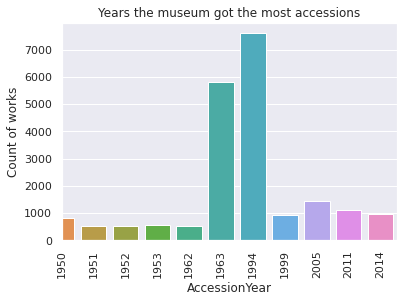

In [182]:
#plt.xlim(1800,2021)
plt.title('Years the museum got the most accessions')
g = sns.barplot(data = year_accession,x= 'AccessionYear',y='Count of works')
g.set(xlim=(1, None))
g.set_xticklabels(g.get_xticklabels(),rotation = 90)
fig = g.get_figure()
fig.savefig("Years the museum got the most accessions.png")
#plt.show()

We can see that the biggest contribution to our collection was in 1963 and 1994.

## Checking the gender

In [183]:
museum_set.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constiuent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL', 'Creation Time'],
      dtype='object')

In [184]:
museum_set['Artist Gender'].value_counts()

missing                                                                                                                                          373743
|                                                                                                                                                 56241
||                                                                                                                                                20847
female                                                                                                                                             8563
|||                                                                                                                                                6145
                                                                                                                                                  ...  
||||||||||||female|||||                                                                 

May be need to remake some of females with nlp

## The longest creation time

In [140]:
museum_set['Creation Time'] = museum_set['Object End Date'] - museum_set['Object Begin Date']

In [141]:
creation = value_count('Creation Time')
#creation.head()
#print(museum_set[['Object Begin Date','Object End Date','Title','Country','Object Date']][museum_set['Creation Time']==museum_set['Creation Time'].max()])
print(creation['Count of works'].sum())
creation.drop(creation[creation['Count of works']<10000].index,inplace=True)

475527


The longest uncertainty is known for Levallois tools of Paleolithic, they make ca. 240,000–40,000 B.C.

In [142]:
creation['Count of works'].head()

0    154626
1     40463
2     32776
3     16899
4     14587
Name: Count of works, dtype: int64

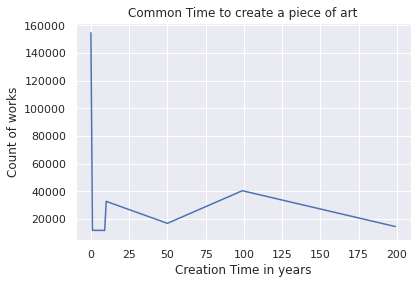

In [150]:
#plt.xlim(1800,2021)
plt.title('Common Time to create a piece of art')
g = sns.lineplot(data =creation,x= 'Creation Time',y='Count of works')
#g.set_xticklabels(g.get_xticklabels(),rotation = 90)
plt.xlabel('Creation Time in years')
plt.savefig('Time to create a piece of art.png')
#plt.show()

There are about 40000 works with 100 creation time in years. It can be because of the uncertainty, it needs checking.

In [79]:
museum_set[['Object Begin Date','Object End Date','Title','Country','Object Date']][museum_set['Object Begin Date']==museum_set['Object Begin Date'].min()]

,Object Begin Date,Object End Date,Title,Country,Object Date
364317,-400000,-240000,"biface, commonly referred to as a hand ax",egypt,"ca. 400,000–240,000 b.c."
364325,-400000,-240000,"biface, commonly referred to as a hand ax",egypt,"ca. 400,000–240,000 b.c."


In [80]:
museum_set.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constiuent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL', 'Creation Time'],
      dtype='object')

In [81]:
museum_set['Credit Line'].value_counts()

the jefferson r. burdick collection, gift of jefferson r. burdick                          37003
gift of dietrich von bothmer, distinguished research curator, greek and roman art, 2011    16270
walker evans archive, 1994                                                                  7951
the cesnola collection, purchased by subscription, 1874–76                                  5360
gift of j. pierpont morgan, 1917                                                            4574
                                                                                           ...  
gift of mrs. hamilton king, 1956                                                               1
elisha whittelsey fund                                                                         1
gift of morihiro and sumiko ogawa, in memory of bumpei usui, 2000                              1
bequest of alice e. getty, 1948                                                                1
                              

In [82]:
museum_set['City'].value_counts()

missing                443519
paris                    4626
nishapur                 3822
london                   2294
new york                 2284
                        ...  
komindimbit village         1
saudakan                    1
frankfurt/main              1
plauen                      1
mandi                       1
Name: City, Length: 2532, dtype: int64

4626 of creations is from Paris. Still we have to separate strings to take out all Parises.

In [83]:
museum_set['Classification'].value_counts()

prints                                                80135
missing                                               74543
prints|ephemera                                       28271
photographs                                           26964
drawings                                              22589
                                                      ...  
membranophone-single-headed / kettle drum-friction        1
transparencies|photographs                                1
textiles-embroidered|textiles-dyed and embroidered        1
ephemera|books                                            1
lapidary work-gabbro                                      1
Name: Classification, Length: 1191, dtype: int64

## What word is the most popular in the name of artworks?

In [144]:
nltk.download('punkt')

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [145]:
from collections import Counter

<IPython.core.display.Javascript object>

            Frequency
Word                 
series          35195
missing         29337
fragment        29186
de              22171
terracotta      19894
issued          18519
cigarettes      17492
plate           12064
(drinking       11488
cup)            10843
&               10312
design          10011
kylix            9328
new              9258
promote          9251
actresses        8613
la               8499
tobacco          7730
et               7661
les              7371
company          7140
old              6803
le               6654
duke             5997
two              5901
card             5807
dress            5797
piece            5399
co.              5363
bowl             4845
man              4837
actors           4829
cards            4742
no.              4709
judge            4630
york             4541
glass            4496
textile          4444
woman            4398
kinney           4369
saint            4355
evening          4287
des              4226
vase      

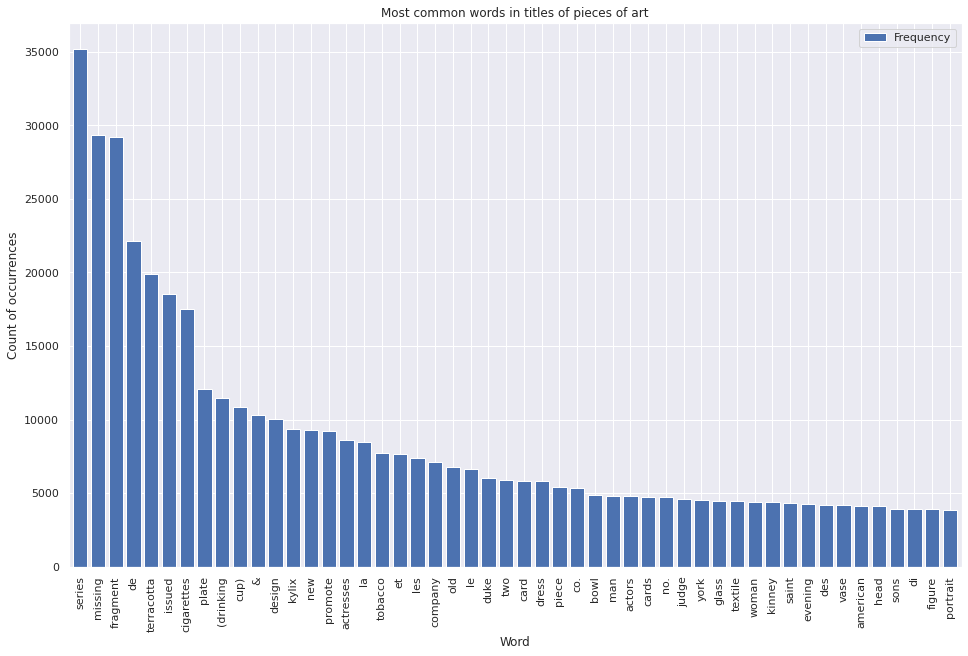

In [149]:

top_N = 50


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b | (missing)'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (museum_set.Title
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
#plt.ylabel('Count of occurrences')
#plt.title('Most common words in titles of pieces of art')
ax = rslt.plot.bar(rot=90, figsize=(16,10), width=0.8,\
              title='Most common words in titles of pieces of art')
ax.set_ylabel('Count of occurrences')
plt.savefig('Count of words.png')
#xticks(rotation=90)

In [338]:
museum_set[['Artist Display Name','Department']][museum_set['Title'].str.contains('cigarettes')].value_counts()

Artist Display Name                                              Department         
allen & ginter                                                   drawings and prints    2960
kinney brothers tobacco company                                  drawings and prints    2943
goodwin & company                                                drawings and prints    2651
w. duke, sons & co.                                              drawings and prints    2370
turkish trophies cigarettes                                      drawings and prints     738
                                                                                        ... 
turco american tobacco company, new york                         drawings and prints       1
neil mccoull co.                                                 drawings and prints       1
paul gavarni [chevalier]|jte. bourmancé|roger et cie             drawings and prints       1
thomas h. hall tobacco|william shakespeare|heppenheimer & mauer  drawings and 

All the pieces of art, which contain word 'cigarettes' in were contributed by tobacco companies are owned by the Department of Drawings and Prints.

## Cluster Artists of Paintings

In [180]:
museum_set['Object Name'].value_counts()

print                               98733
photograph                          28436
drawing                             25650
book                                13340
fragment                             9538
                                    ...  
yonggo                                  1
tabernacle altar                        1
spear with detachable knife head        1
overdoor panels                         1
saint's cuirass (hotokē-do)             1
Name: Object Name, Length: 27255, dtype: int64

In [213]:
drawing_creators.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constiuent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL', 'Creation Time'],
      dtype='object')

In [218]:
drawing_creators = pd.DataFrame(museum_set[museum_set['Object Name'] == 'book'])
drawing_creators['Object End Date'].value_counts()

1900    364
1950    149
1899    146
1905    132
1930    124
       ... 
2018      1
2078      1
1450      1
2009      1
1718      1
Name: Object End Date, Length: 551, dtype: int64

In [ ]:
years_of_creation

In [221]:
from fpdf import FPDF

In [220]:
!pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=574ac933515f8917586ab1dc922d22fb3c055c9e0b4e5bcd38e71141bac215f5
  Stored in directory: /root/.cache/pip/wheels/b4/7f/00/f90ea7c44f8b921477205baa66a7aaf04be398f743ea946fd5
Successfully built fpdf
